In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from polygon import StocksClient  # Ensure correct import based on Polygon API
import logging
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
import json

In [24]:
API_KEY = "uwQtl3txGt5BLbecq7ZbIu0ZbuitCGjc"

In [25]:

logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.StreamHandler(),  # Logs to console
        logging.FileHandler("app.log")  # Logs to a file named app.log
    ]
)

# `get_GLD` Function Overview

The `get_GLD` function is an asynchronous Python function designed to retrieve, process, and analyze historical close price data for the **GLD** (SPDR Gold Shares) ticker symbol. This function leverages the `StocksClient` to fetch aggregate bar data, processes the data using `pandas`, identifies outliers, visualizes the close prices, and saves the processed data to a CSV file. Comprehensive logging is implemented to facilitate debugging and tracking of the function's execution.


2024-09-30 20:28:13,800 - INFO - Initializing StocksClient...
2024-09-30 20:28:13,817 - INFO - Fetching aggregate bars data for 'SLV'...
2024-09-30 20:28:13,999 - INFO - HTTP Request: GET https://api.polygon.io/v2/aggs/ticker/GLD/range/1/day/2019-01-01/2024-09-01?adjusted=true&sort=asc&limit=500000 "HTTP/1.1 200 OK"
2024-09-30 20:28:14,070 - INFO - Converting response to DataFrame...
2024-09-30 20:28:14,095 - INFO - Creating daily date range...
2024-09-30 20:28:14,105 - INFO - Converting 'c' column to numeric...
2024-09-30 20:28:14,107 - INFO - Mean: 168.45, Standard Deviation: 23.65
2024-09-30 20:28:14,108 - INFO - No outliers detected.
2024-09-30 20:28:14,109 - INFO - Plotting close prices...


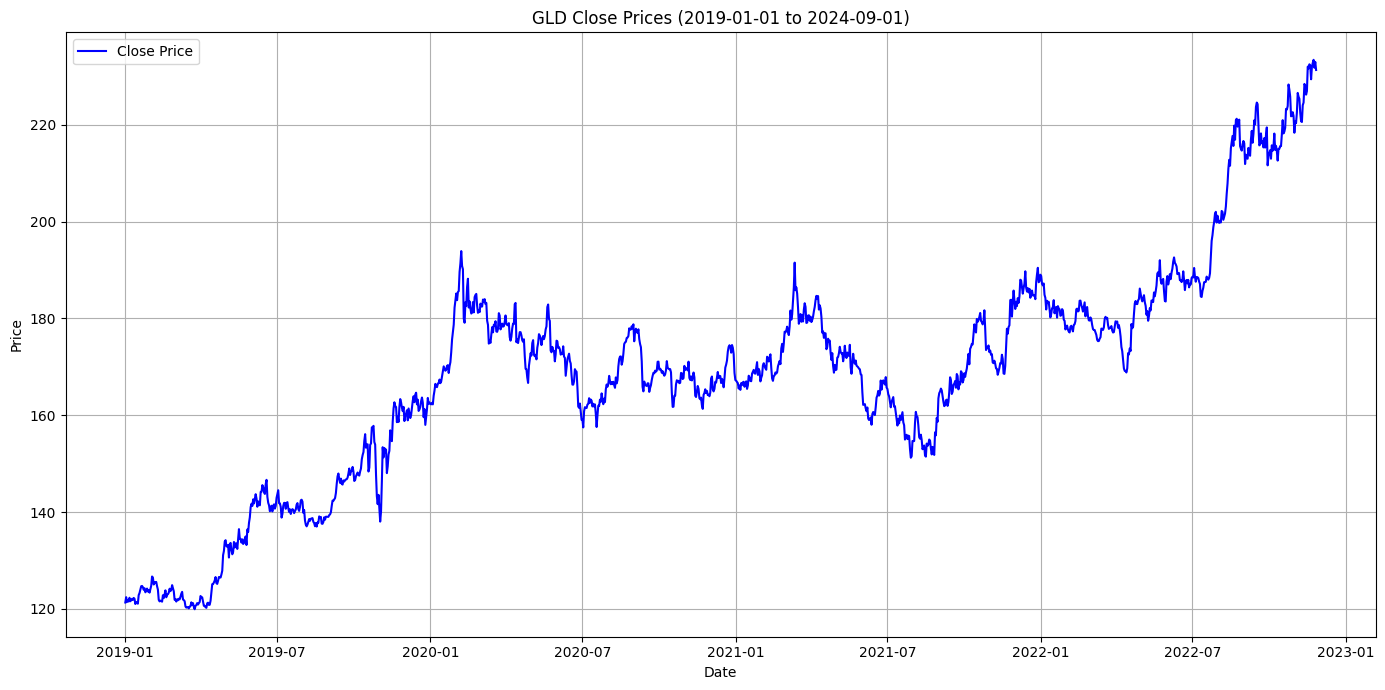

2024-09-30 20:28:14,286 - INFO - GLD prices saved to 'GLD-Prices.csv'.


,c
Date,
2019-01-01,121.33
2019-01-02,122.43
2019-01-03,121.44
2019-01-04,121.86
2019-01-05,121.53
...,...
2022-11-22,232.76
2022-11-23,233.39
2022-11-24,231.75


In [26]:
async def get_GLD():
    try:
        logging.info("Initializing StocksClient...")
        async_stock_client = StocksClient(API_KEY, True)

        logging.info("Fetching aggregate bars data for 'SLV'...")
        response = await async_stock_client.get_aggregate_bars(
            'GLD',
            '2019-01-01',
            '2024-09-01',
            full_range=True
        )

        if not response:
            logging.error("Received empty response from StocksClient.")
            return None

        logging.info("Converting response to DataFrame...")
        df = pd.DataFrame(response)

        if 't' not in df.columns or 'c' not in df.columns:
            logging.error("Expected columns 't' or 'c' not found in response.")
            return None

        df['Date'] = pd.to_datetime(df['t'], unit='ms')
        df.set_index('Date', inplace=True)
        df.drop(columns=['t'], inplace=True)

        logging.info("Creating daily date range...")
        start_date = pd.to_datetime('2019-01-01')
        num_rows = len(df)
        df['Date'] = pd.date_range(
            start=start_date, periods=num_rows, freq='D')
        df.set_index('Date', inplace=True)

        logging.info("Converting 'c' column to numeric...")
        df['c'] = pd.to_numeric(df['c'], errors='coerce')

        mean = df['c'].mean()
        std = df['c'].std()
        logging.info(f"Mean: {mean:.2f}, Standard Deviation: {std:.2f}")

        outliers = df[(np.abs(df['c'] - mean) / std) > 3]
        if not outliers.empty:
            logging.info(f"Detected {len(outliers)} outliers.")
        else:
            logging.info("No outliers detected.")

        df = df[['c']]

        logging.info("Plotting close prices...")
        plt.figure(figsize=(14, 7))
        plt.plot(df.index, df['c'], label='Close Price', color='blue')
        if not outliers.empty:
            plt.scatter(outliers.index,
                        outliers['c'], color='red', label='Outliers')
        plt.title('GLD Close Prices (2019-01-01 to 2024-09-01)')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        csv_filename = 'GLD-Prices.csv'
        df.to_csv(csv_filename, index=True)
        logging.info(f"GLD prices saved to '{csv_filename}'.")

    except Exception as e:
        logging.error(f"An error occurred in get_GLD: {e}")
        return None
    return df


await get_GLD()

# `get_SLV` Function Overview

The `get_SLV` function is an asynchronous Python function designed to retrieve, process, and analyze historical close price data for the **SLV** (iShares Silver Trust) ticker symbol. This function leverages the `StocksClient` to fetch aggregate bar data, processes the data using `pandas`, identifies outliers, visualizes the close prices, and saves the processed data to a CSV file. Comprehensive logging is implemented to facilitate debugging and tracking of the function's execution.


2024-09-30 20:28:14,330 - INFO - Initializing StocksClient...
2024-09-30 20:28:14,339 - INFO - Fetching aggregate bars data for 'SLV'...
2024-09-30 20:28:14,603 - INFO - HTTP Request: GET https://api.polygon.io/v2/aggs/ticker/SLV/range/1/day/2019-01-01/2024-09-01?adjusted=true&sort=asc&limit=500000 "HTTP/1.1 200 OK"
2024-09-30 20:28:14,649 - INFO - Converting response to DataFrame...
2024-09-30 20:28:14,654 - INFO - Creating daily date range...
2024-09-30 20:28:14,655 - INFO - Converting 'c' column to numeric...
2024-09-30 20:28:14,657 - INFO - Mean: 20.39, Standard Deviation: 3.79
2024-09-30 20:28:14,658 - INFO - No outliers detected.
2024-09-30 20:28:14,658 - INFO - Plotting close prices...


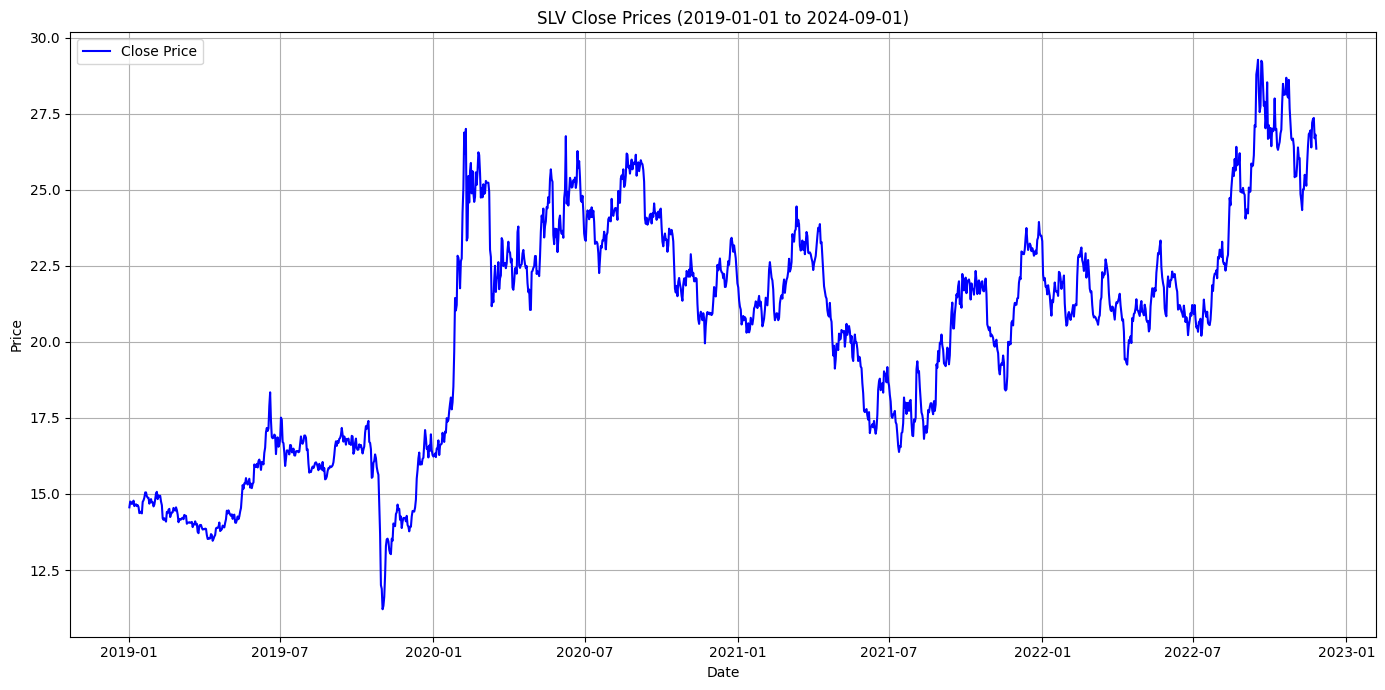

2024-09-30 20:28:14,828 - INFO - SLV prices saved to 'SLV-Prices.csv'.


,c
Date,
2019-01-01,14.56
2019-01-02,14.75
2019-01-03,14.73
2019-01-04,14.67
2019-01-05,14.69
...,...
2022-11-22,27.32
2022-11-23,27.36
2022-11-24,26.69


In [27]:
async def get_SLV():
    try:
        logging.info("Initializing StocksClient...")
        async_stock_client = StocksClient(API_KEY, True)

        logging.info("Fetching aggregate bars data for 'SLV'...")
        response = await async_stock_client.get_aggregate_bars(
            'SLV',
            '2019-01-01',
            '2024-09-01',
            full_range=True
        )

        if not response:
            logging.error("Received empty response from StocksClient.")
            return None

        logging.info("Converting response to DataFrame...")
        df = pd.DataFrame(response)

        if 't' not in df.columns or 'c' not in df.columns:
            logging.error("Expected columns 't' or 'c' not found in response.")
            return None

        df['Date'] = pd.to_datetime(df['t'], unit='ms')
        df.set_index('Date', inplace=True)
        df.drop(columns=['t'], inplace=True)

        logging.info("Creating daily date range...")
        start_date = pd.to_datetime('2019-01-01')
        num_rows = len(df)
        df['Date'] = pd.date_range(
            start=start_date, periods=num_rows, freq='D')
        df.set_index('Date', inplace=True)

        logging.info("Converting 'c' column to numeric...")
        df['c'] = pd.to_numeric(df['c'], errors='coerce')

        mean = df['c'].mean()
        std = df['c'].std()
        logging.info(f"Mean: {mean:.2f}, Standard Deviation: {std:.2f}")

        outliers = df[(np.abs(df['c'] - mean) / std) > 3]
        if not outliers.empty:
            logging.info(f"Detected {len(outliers)} outliers.")
        else:
            logging.info("No outliers detected.")

        df = df[['c']]

        logging.info("Plotting close prices...")
        plt.figure(figsize=(14, 7))
        plt.plot(df.index, df['c'], label='Close Price', color='blue')
        if not outliers.empty:
            plt.scatter(outliers.index,
                        outliers['c'], color='red', label='Outliers')
        plt.title('SLV Close Prices (2019-01-01 to 2024-09-01)')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        csv_filename = 'SLV-Prices.csv'
        df.to_csv(csv_filename, index=True)
        logging.info(f"SLV prices saved to '{csv_filename}'.")

    except Exception as e:
        logging.error(f"An error occurred in get_SLV: {e}")
        return None
    return df


await get_SLV()

# Seasonal Differencing and Decomposition Functions

## **Seasonal Differencing**

**Concept Overview:**
Seasonal differencing is a technique used in time series analysis to remove seasonal patterns from data. Seasonality refers to regular and predictable fluctuations that recur every specific period, such as daily, weekly, monthly, or yearly cycles. These patterns can obscure underlying trends and make it challenging to model and forecast the data accurately.

**Purpose:**
By applying seasonal differencing, we subtract the value of the series from its previous season (e.g., subtracting the value from 12 months ago in monthly data). This transformation helps in stabilizing the mean of the time series, making it more stationary and suitable for further analysis and modeling.

**Benefits:**
- **Enhances Stationarity:** Removes seasonal effects, leading to a more consistent mean and variance over time.
- **Improves Model Accuracy:** Facilitates the application of statistical models that assume stationarity, such as ARIMA.
- **Simplifies Forecasting:** Makes it easier to identify and model underlying trends without the interference of seasonal noise.

---

## **Seasonal Decomposition Analysis**

**Concept Overview:**
Seasonal decomposition breaks down a time series into its fundamental components: trend, seasonal, and residual (noise). This separation allows analysts to understand and interpret the different factors influencing the data.

**Purpose:**
The primary goal of seasonal decomposition is to isolate and examine each component individually. By doing so, we can gain insights into:
- **Trend:** The long-term progression or movement in the data (e.g., upward or downward trends).
- **Seasonal:** The repeating short-term cycles or patterns (e.g., increased sales during holidays).
- **Residual:** The irregular or random fluctuations that cannot be explained by trend or seasonality.

**Benefits:**
- **Enhanced Understanding:** Provides a clear view of the underlying structures within the data.
- **Improved Modeling:** Allows for more precise forecasting by modeling each component separately.
- **Anomaly Detection:** Helps in identifying outliers or unexpected changes in the residual component.

---

**In Summary:**
Both seasonal differencing and seasonal decomposition are essential tools in time series analysis for handling and understanding seasonality. Seasonal differencing focuses on removing seasonal patterns to achieve stationarity, while seasonal decomposition provides a detailed breakdown of the series into trend, seasonal, and residual components. Together, they enhance the accuracy and interpretability of time series models and forecasts.


In [28]:
def seasonal_differencing(series, seasonal_period):
    """
    Performs seasonal differencing on a time series.

    Parameters:
        series (pd.Series): The time series data.
        seasonal_period (int): The number of periods in a season (e.g., 7 for weekly seasonality).

    Returns:
        pd.Series: Seasonally differenced series.
    """
    try:
        logging.info(
            f"Performing seasonal differencing with period={seasonal_period}...")
        differenced = series.diff(seasonal_period).dropna()
        logging.info("Seasonal differencing completed.")
        return differenced
    except Exception as e:
        logging.error(f"An error occurred during seasonal differencing: {e}")
        return None
    

def seasonal_decomposition_analysis(series, seasonal_period, model='additive'):
    """
    Performs seasonal decomposition on a time series.

    Parameters:
        series (pd.Series): The time series data.
        seasonal_period (int): The number of periods in a season.
        model (str): Type of seasonal component ('additive' or 'multiplicative').

    Returns:
        DecomposeResult: Object containing the trend, seasonal, and residual components.
    """
    try:
        logging.info(
            f"Performing seasonal decomposition with period={seasonal_period} and model='{model}'...")
        decomposition = seasonal_decompose(
            series, model=model, period=seasonal_period, extrapolate_trend='freq')
        logging.info("Seasonal decomposition completed.")
        return decomposition
    except Exception as e:
        logging.error(f"An error occurred during seasonal decomposition: {e}")
        return None

# Augmented Dickey-Fuller (ADF) and KPSS Test Functions

## **`perform_adf_test` Function

**Purpose:**  
The `perform_adf_test` function conducts the Augmented Dickey-Fuller (ADF) test on a time series to determine its stationarity. Stationarity is a crucial property for many time series models, indicating that the statistical properties of the series remain constant over time.

**Concept Overview:**
- **Augmented Dickey-Fuller (ADF) Test:**  
  A statistical test used to assess whether a time series has a unit root, which implies non-stationarity. The ADF test helps in identifying the presence of a trend or other forms of non-stationarity in the data.

**Workflow:**
1. **Seasonal Differencing:**  
   The function first removes seasonal patterns from the data by applying seasonal differencing. This step stabilizes the mean of the series by eliminating regular seasonal fluctuations.
   
2. **Visualization:**  
   After differencing, the function plots the transformed series. Visual inspection of this plot aids in assessing the stationarity of the series.
   
3. **ADF Testing:**  
   The ADF test is then performed on the seasonally differenced series. The results, including the test statistic and p-value, indicate whether the series is stationary.

**Key Outcomes:**
- **Test Statistic & p-value:**  
  These values help in determining whether to reject the null hypothesis of non-stationarity.
  
- **Decision Making:**  
  A low p-value suggests rejecting the null hypothesis, indicating that the series is stationary.

---

## **`perform_kpss_test` Function

**Purpose:**  
The `perform_kpss_test` function executes the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test on a time series to evaluate its stationarity. Unlike the ADF test, the KPSS test has a different null hypothesis, providing complementary insights into the stationarity of the data.

**Concept Overview:**
- **Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test:**  
  A statistical test used to examine whether a time series is stationary around a deterministic trend (trend-stationary) or has a unit root (non-stationary). The KPSS test assesses the null hypothesis that an observable time series is stationary.

**Workflow:**
1. **Seasonal Differencing:**  
   Similar to the ADF test function, KPSS begins by removing seasonal effects through seasonal differencing, ensuring that the test focuses on the underlying trend and residual components.
   
2. **Visualization:**  
   The seasonally differenced series is plotted to provide a visual assessment of its stationarity, aiding in the interpretation of the test results.
   
3. **KPSS Testing:**  
   The KPSS test is performed on the transformed series. The results, including the test statistic and p-value, help determine the stationarity of the series.

**Key Outcomes:**
- **Test Statistic & p-value:**  
  These metrics are used to decide whether to reject the null hypothesis of stationarity.
  
- **Decision Making:**  
  A low p-value indicates rejecting the null hypothesis, suggesting that the series is non-stationary.

---

## **Summary**

Both `perform_adf_test` and `perform_kpss_test` functions are integral for assessing the stationarity of time series data, a fundamental assumption for many forecasting models. By incorporating seasonal differencing and visualizations, these functions provide a comprehensive analysis:

- **`perform_adf_test`:**  
  Focuses on identifying unit roots to determine stationarity, with the null hypothesis being non-stationarity.

- **`perform_kpss_test`:**  
  Evaluates stationarity with the null hypothesis being stationarity, offering a complementary perspective to the ADF test.

Together, these functions enable robust diagnostics of time series data, ensuring that subsequent modeling efforts are based on sound statistical foundations.


In [29]:
async def perform_adf_test(ticker, series, seasonal_period=7):
    """
    Performs the Augmented Dickey-Fuller test on a seasonally differenced series.

    Parameters:
        series (pd.Series): The original time series data.
        seasonal_period (int): The number of periods in a season.

    Returns:
        dict: A dictionary containing the test results.
    """
    try:
        logging.info("Starting ADF test with seasonal differencing...")

        # Perform seasonal differencing
        differenced = seasonal_differencing(series, seasonal_period)
        if differenced is None or differenced.empty:
            logging.error(
                "Seasonal differencing failed or resulted in empty series.")
            return None

        # Plot the seasonally differenced data
        logging.info("Plotting seasonally differenced data for ADF test...")
        plt.figure(figsize=(14, 7))
        plt.plot(differenced.index, differenced,
                 label='Seasonally Differenced Close Price', color='green')
        plt.title(
            f'Seasonally Differenced {ticker} Close Prices (Period={seasonal_period})')
        plt.xlabel('Date')
        plt.ylabel('Differenced Price')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Drop NaN values
        differenced = differenced.dropna()
        if differenced.empty:
            logging.error(
                "No data available after seasonal differencing for ADF test.")
            return None

        # Perform ADF test
        adf_result = adfuller(differenced, autolag='AIC')

        adf_output = {
            'Test Statistic': adf_result[0],
            'p-value': adf_result[1],
            'Used Lag': adf_result[2],
            'Number of Observations': adf_result[3],
            'Critical Values': adf_result[4],
            'IC Best': adf_result[5]
        }

        logging.info("ADF Test Results (on seasonally differenced data):")
        for key, value in adf_output.items():
            if key != 'Critical Values':
                logging.info(f"{key}: {value}")
            else:
                logging.info("Critical Values:")
                for cv_key, cv_value in value.items():
                    logging.info(f"   {cv_key}: {cv_value}")

        return adf_output

    except Exception as e:
        logging.error(f"An error occurred during ADF test: {e}")
        return None


async def perform_kpss_test(ticker, series, seasonal_period=7, regression='c'):
    """
    Performs the KPSS test on a seasonally differenced series.

    Parameters:
        series (pd.Series): The original time series data.
        seasonal_period (int): The number of periods in a season.
        regression (str): Type of regression to include in the test ('c' or 'ct').

    Returns:
        dict: A dictionary containing the test results.
    """
    try:
        logging.info("Starting KPSS test with seasonal differencing...")

        # Perform seasonal differencing
        differenced = seasonal_differencing(series, seasonal_period)
        if differenced is None or differenced.empty:
            logging.error(
                "Seasonal differencing failed or resulted in empty series.")
            return None

        # Plot the seasonally differenced data
        logging.info("Plotting seasonally differenced data for KPSS test...")
        plt.figure(figsize=(14, 7))
        plt.plot(differenced.index, differenced,
                 label='Seasonally Differenced Close Price', color='purple')
        plt.title(
            f'Seasonally Differenced {ticker} Close Prices (Period={seasonal_period})')
        plt.xlabel('Date')
        plt.ylabel('Differenced Price')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Drop NaN values
        differenced = differenced.dropna()
        if differenced.empty:
            logging.error(
                "No data available after seasonal differencing for KPSS test.")
            return None

        # Perform KPSS test
        kpss_result = kpss(differenced, regression=regression, nlags="auto")

        kpss_output = {
            'Test Statistic': kpss_result[0],
            'p-value': kpss_result[1],
            'Lags Used': kpss_result[2],
            'Critical Values': kpss_result[3]
        }

        logging.info("KPSS Test Results (on seasonally differenced data):")
        for key, value in kpss_output.items():
            if key != 'Critical Values':
                logging.info(f"{key}: {value}")
            else:
                logging.info("Critical Values:")
                for cv_key, cv_value in value.items():
                    logging.info(f"   {cv_key}: {cv_value}")

        return kpss_output

    except Exception as e:
        logging.error(f"An error occurred during KPSS test: {e}")
        return None

# GLD Data Retrieval and Stationarity Testing

This workflow outlines the steps to fetch historical **GLD** (SPDR Gold Shares) close price data, assess its stationarity, and save the analysis results for future reference.

## **Workflow Steps**

1. **Data Retrieval**
   - **Fetch GLD Data:**  
     Retrieve historical close price data for the GLD ticker from January 1, 2019, to September 1, 2024.
   - **Validation:**  
     Ensure that the data retrieval was successful. If not, log an error and halt the process.

2. **Stationarity Testing**
   - **Augmented Dickey-Fuller (ADF) Test:**  
     Assess whether the GLD time series is stationary. A stationary series has constant statistical properties over time, which is essential for reliable forecasting.
   - **Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test:**  
     Complement the ADF test by evaluating the stationarity of the series from a different perspective. While ADF tests for non-stationarity, KPSS tests for stationarity.

3. **Results Compilation**
   - **Aggregate Test Results:**  
     Combine the outcomes of both the ADF and KPSS tests into a single dictionary for easy interpretation.

4. **Logging and Saving**
   - **Log Test Results:**  
     Record the test results in the logging system to keep a record of the analysis.
   - **Save to JSON:**  
     Export the compiled test results to a JSON file (`GLD_Test_Results.json`) for persistent storage and future analysis.

## **Purpose and Benefits**

- **Data Integrity:**  
  Ensures that only valid and successfully retrieved data is processed, preventing errors in subsequent analysis.
  
- **Comprehensive Analysis:**  
  Utilizing both ADF and KPSS tests provides a robust assessment of the time series' stationarity, leveraging the strengths of each test.
  
- **Record Keeping:**  
  Saving results to a JSON file allows for easy access, sharing, and integration with other tools or reports.

## **Conclusion**

By following this workflow, you can effectively retrieve GLD close price data, evaluate its stationarity, and maintain a clear record of your analysis. This process is fundamental for time series forecasting and financial analysis, ensuring that models are built on stable and reliable data foundations.


2024-09-30 20:32:09,512 - INFO - Initializing StocksClient...
2024-09-30 20:32:09,535 - INFO - Fetching aggregate bars data for 'SLV'...
2024-09-30 20:32:09,716 - INFO - HTTP Request: GET https://api.polygon.io/v2/aggs/ticker/GLD/range/1/day/2019-01-01/2024-09-01?adjusted=true&sort=asc&limit=500000 "HTTP/1.1 200 OK"
2024-09-30 20:32:09,780 - INFO - Converting response to DataFrame...
2024-09-30 20:32:09,810 - INFO - Creating daily date range...
2024-09-30 20:32:09,822 - INFO - Converting 'c' column to numeric...
2024-09-30 20:32:09,823 - INFO - Mean: 168.45, Standard Deviation: 23.65
2024-09-30 20:32:09,824 - INFO - No outliers detected.
2024-09-30 20:32:09,825 - INFO - Plotting close prices...


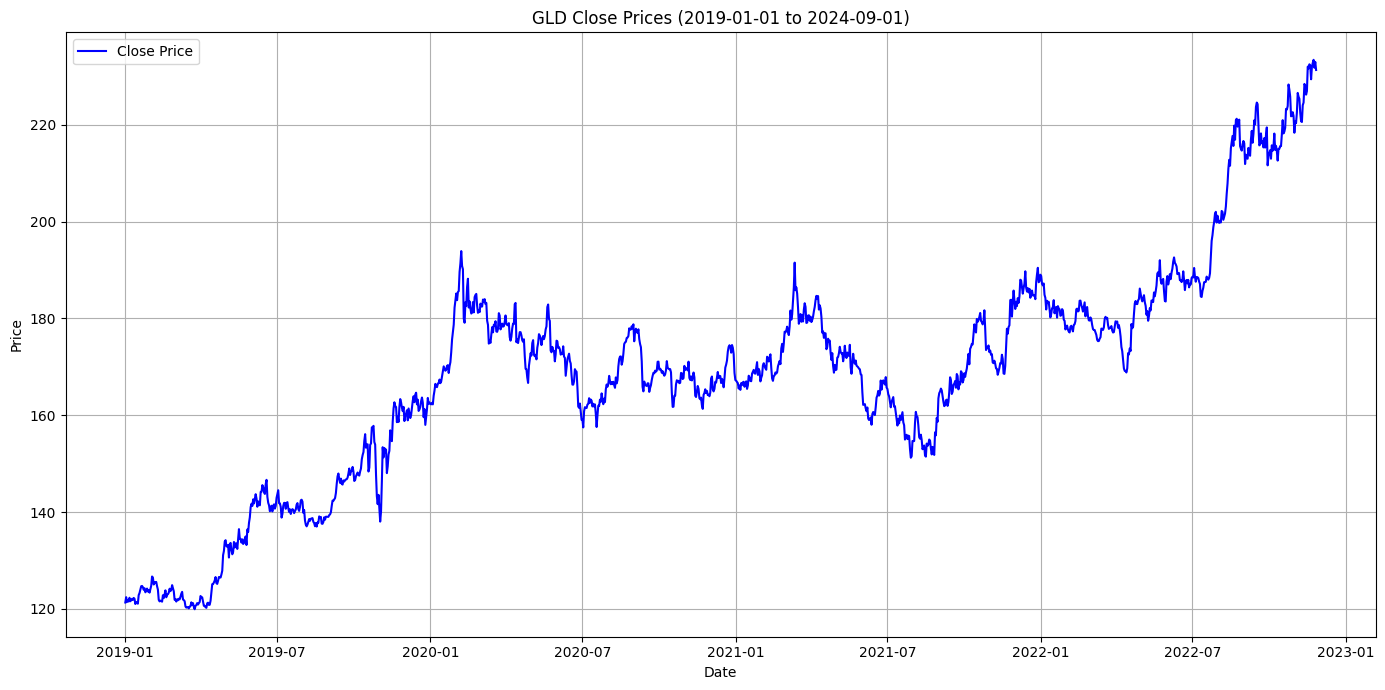

2024-09-30 20:32:10,067 - INFO - GLD prices saved to 'GLD-Prices.csv'.
2024-09-30 20:32:10,069 - INFO - Starting ADF test with seasonal differencing...
2024-09-30 20:32:10,069 - INFO - Performing seasonal differencing with period=7...
2024-09-30 20:32:10,072 - INFO - Seasonal differencing completed.
2024-09-30 20:32:10,072 - INFO - Plotting seasonally differenced data for ADF test...


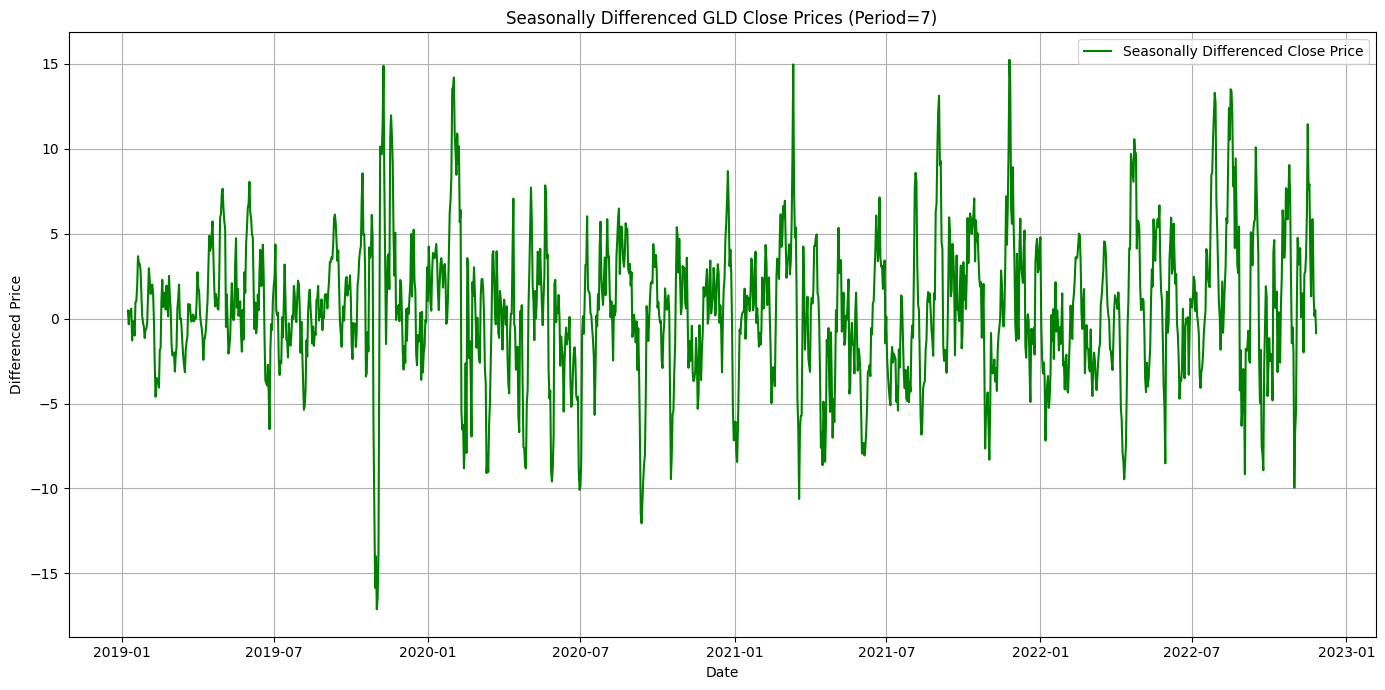

2024-09-30 20:32:10,295 - INFO - ADF Test Results (on seasonally differenced data):
2024-09-30 20:32:10,296 - INFO - Test Statistic: -6.5842170652828775
2024-09-30 20:32:10,297 - INFO - p-value: 7.383913067736119e-09
2024-09-30 20:32:10,297 - INFO - Used Lag: 21
2024-09-30 20:32:10,297 - INFO - Number of Observations: 1397
2024-09-30 20:32:10,298 - INFO - Critical Values:
2024-09-30 20:32:10,298 - INFO -    1%: -3.4350395894411734
2024-09-30 20:32:10,298 - INFO -    5%: -2.863611117606763
2024-09-30 20:32:10,299 - INFO -    10%: -2.5678726562185354
2024-09-30 20:32:10,300 - INFO - IC Best: 5547.328124708149
2024-09-30 20:32:10,300 - INFO - Starting KPSS test with seasonal differencing...
2024-09-30 20:32:10,300 - INFO - Performing seasonal differencing with period=7...
2024-09-30 20:32:10,301 - INFO - Seasonal differencing completed.
2024-09-30 20:32:10,301 - INFO - Plotting seasonally differenced data for KPSS test...


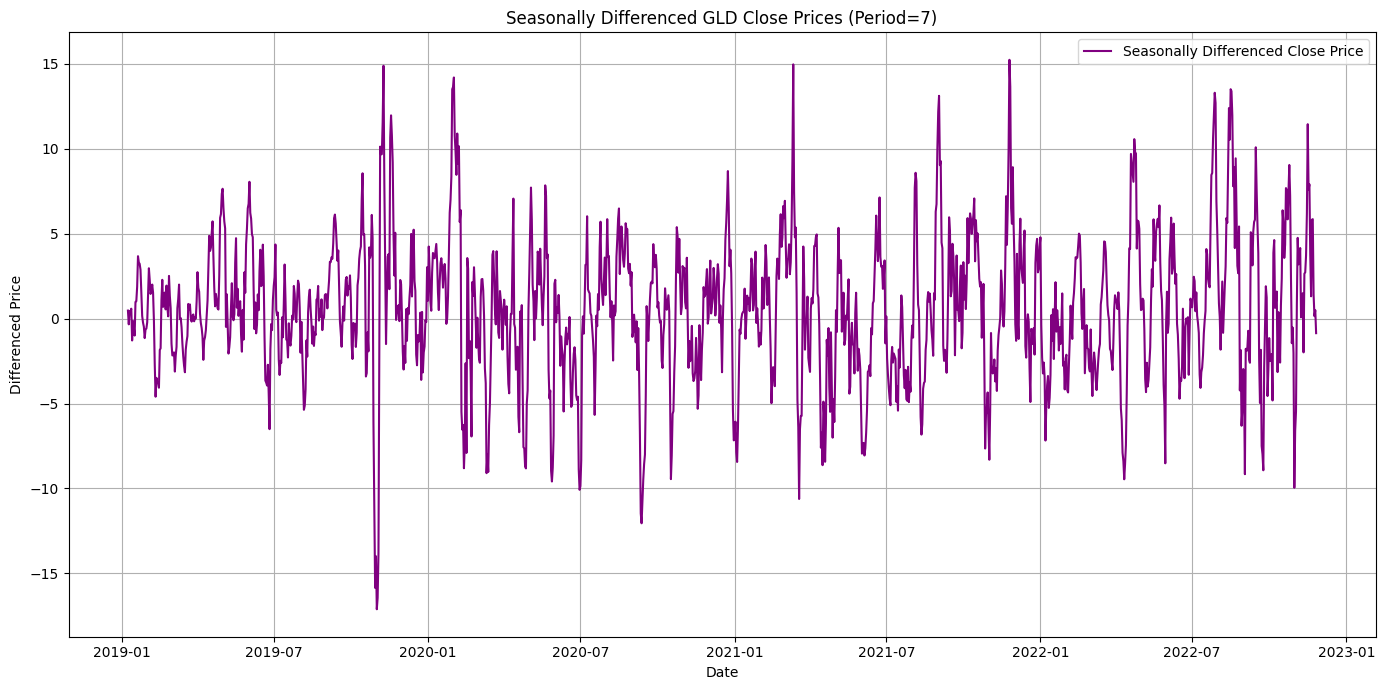

2024-09-30 20:32:10,508 - INFO - KPSS Test Results (on seasonally differenced data):
2024-09-30 20:32:10,509 - INFO - Test Statistic: 0.12730774138594153
2024-09-30 20:32:10,509 - INFO - p-value: 0.0846152937297379
2024-09-30 20:32:10,509 - INFO - Lags Used: 20
2024-09-30 20:32:10,510 - INFO - Critical Values:
2024-09-30 20:32:10,510 - INFO -    10%: 0.119
2024-09-30 20:32:10,510 - INFO -    5%: 0.146
2024-09-30 20:32:10,511 - INFO -    2.5%: 0.176
2024-09-30 20:32:10,511 - INFO -    1%: 0.216
2024-09-30 20:32:10,512 - INFO - Test Results:
2024-09-30 20:32:10,513 - INFO - {
    "ADF Test": {
        "Test Statistic": -6.5842170652828775,
        "p-value": 7.383913067736119e-09,
        "Used Lag": 21,
        "Number of Observations": 1397,
        "Critical Values": {
            "1%": -3.4350395894411734,
            "5%": -2.863611117606763,
            "10%": -2.5678726562185354
        },
        "IC Best": 5547.328124708149
    },
    "KPSS Test": {
        "Test Statistic": 0.1

In [34]:
# Fetch the GLD data
data = await get_GLD()

if data is None:
    logging.error("Data fetching failed. Exiting main function.")


# Perform ADF Test
adf_results = await perform_adf_test('GLD', data)
if adf_results is None:
    logging.error("ADF test failed.")

# Perform KPSS Test
# Use 'ct' if you want to include a trend
kpss_results = await perform_kpss_test('GLD', data, regression='ct')
if kpss_results is None:
    logging.error("KPSS test failed.")

# Prepare the test results dictionary
test_results = {
    'ADF Test': adf_results,
    'KPSS Test': kpss_results
}

# Log the test results
logging.info("Test Results:")
logging.info(json.dumps(test_results, indent=4))

# Save the test results to a JSON file
json_filename = 'GLD_Test_Results.json'
try:
    with open(json_filename, 'w') as json_file:
        json.dump(test_results, json_file, indent=4, default=str)
    logging.info(f"Test results saved to '{json_filename}'.")
except Exception as e:
    logging.error(f"Failed to save test results to JSON: {e}")

# SLV Data Retrieval and Stationarity Testing

This workflow outlines the steps to fetch historical **SLV** (iShares Silver Trust) close price data, assess its stationarity, and save the analysis results for future reference.

## **Workflow Steps**

1. **Data Retrieval**
   - **Fetch SLV Data:**  
     Retrieve historical close price data for the SLV ticker from January 1, 2019, to September 1, 2024.
   - **Validation:**  
     Ensure that the data retrieval was successful. If not, log an error and halt the process.

2. **Stationarity Testing**
   - **Augmented Dickey-Fuller (ADF) Test:**  
     Assess whether the SLV time series is stationary. A stationary series has constant statistical properties over time, which is essential for reliable forecasting.
   - **Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test:**  
     Complement the ADF test by evaluating the stationarity of the series from a different perspective. While ADF tests for non-stationarity, KPSS tests for stationarity.

3. **Results Compilation**
   - **Aggregate Test Results:**  
     Combine the outcomes of both the ADF and KPSS tests into a single dictionary for easy interpretation.

4. **Logging and Saving**
   - **Log Test Results:**  
     Record the test results in the logging system to keep a record of the analysis.
   - **Save to JSON:**  
     Export the compiled test results to a JSON file (`SLV_Test_Results.json`) for persistent storage and future analysis.

## **Purpose and Benefits**

- **Data Integrity:**  
  Ensures that only valid and successfully retrieved data is processed, preventing errors in subsequent analysis.
  
- **Comprehensive Analysis:**  
  Utilizing both ADF and KPSS tests provides a robust assessment of the time series' stationarity, leveraging the strengths of each test.
  
- **Record Keeping:**  
  Saving results to a JSON file allows for easy access, sharing, and integration with other tools or reports.

## **Conclusion**

By following this workflow, you can effectively retrieve SLV close price data, evaluate its stationarity, and maintain a clear record of your analysis. This process is fundamental for time series forecasting and financial analysis, ensuring that models are built on stable and reliable data foundations.


2024-09-30 20:28:41,905 - INFO - Initializing StocksClient...
2024-09-30 20:28:41,926 - INFO - Fetching aggregate bars data for 'SLV'...
2024-09-30 20:28:42,120 - INFO - HTTP Request: GET https://api.polygon.io/v2/aggs/ticker/SLV/range/1/day/2019-01-01/2024-09-01?adjusted=true&sort=asc&limit=500000 "HTTP/1.1 200 OK"
2024-09-30 20:28:42,167 - INFO - Converting response to DataFrame...
2024-09-30 20:28:42,174 - INFO - Creating daily date range...
2024-09-30 20:28:42,176 - INFO - Converting 'c' column to numeric...
2024-09-30 20:28:42,177 - INFO - Mean: 20.39, Standard Deviation: 3.79
2024-09-30 20:28:42,178 - INFO - No outliers detected.
2024-09-30 20:28:42,179 - INFO - Plotting close prices...


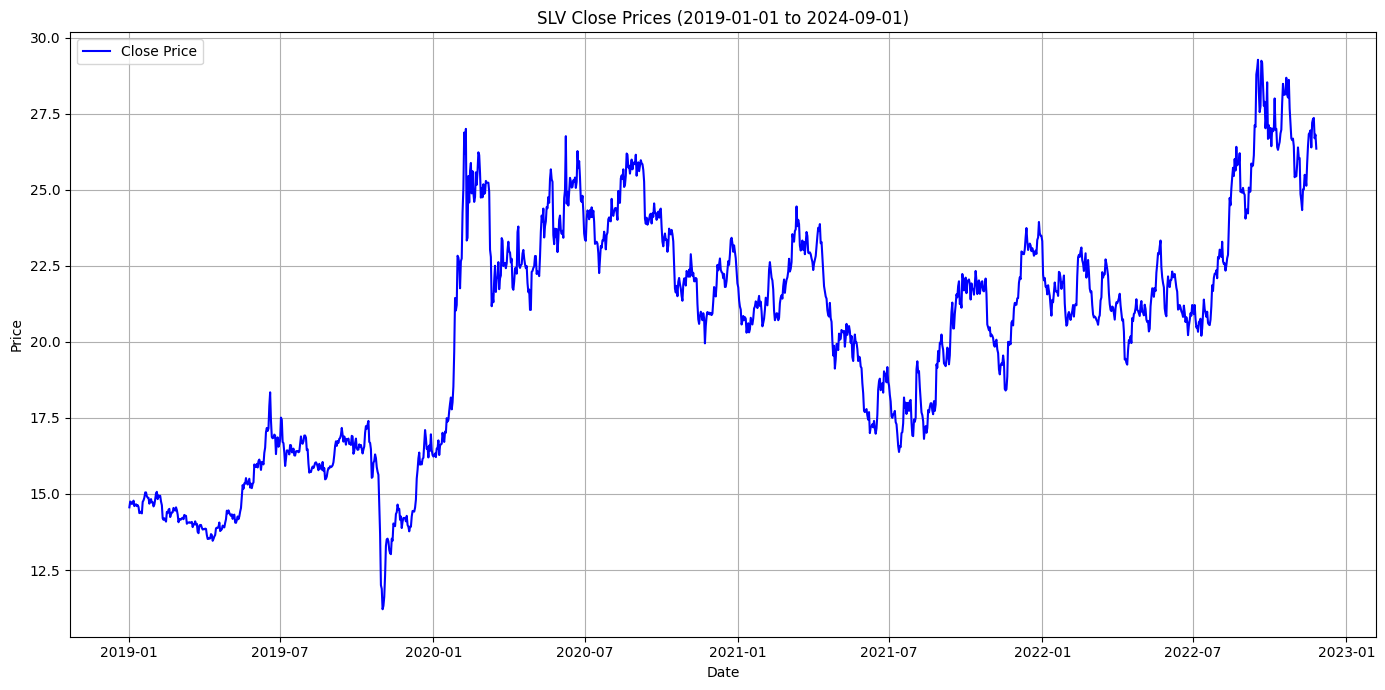

2024-09-30 20:28:42,338 - INFO - SLV prices saved to 'SLV-Prices.csv'.
2024-09-30 20:28:42,339 - INFO - Starting ADF test with seasonal differencing...
2024-09-30 20:28:42,340 - INFO - Performing seasonal differencing with period=7...
2024-09-30 20:28:42,341 - INFO - Seasonal differencing completed.
2024-09-30 20:28:42,341 - INFO - Plotting seasonally differenced data for ADF test...


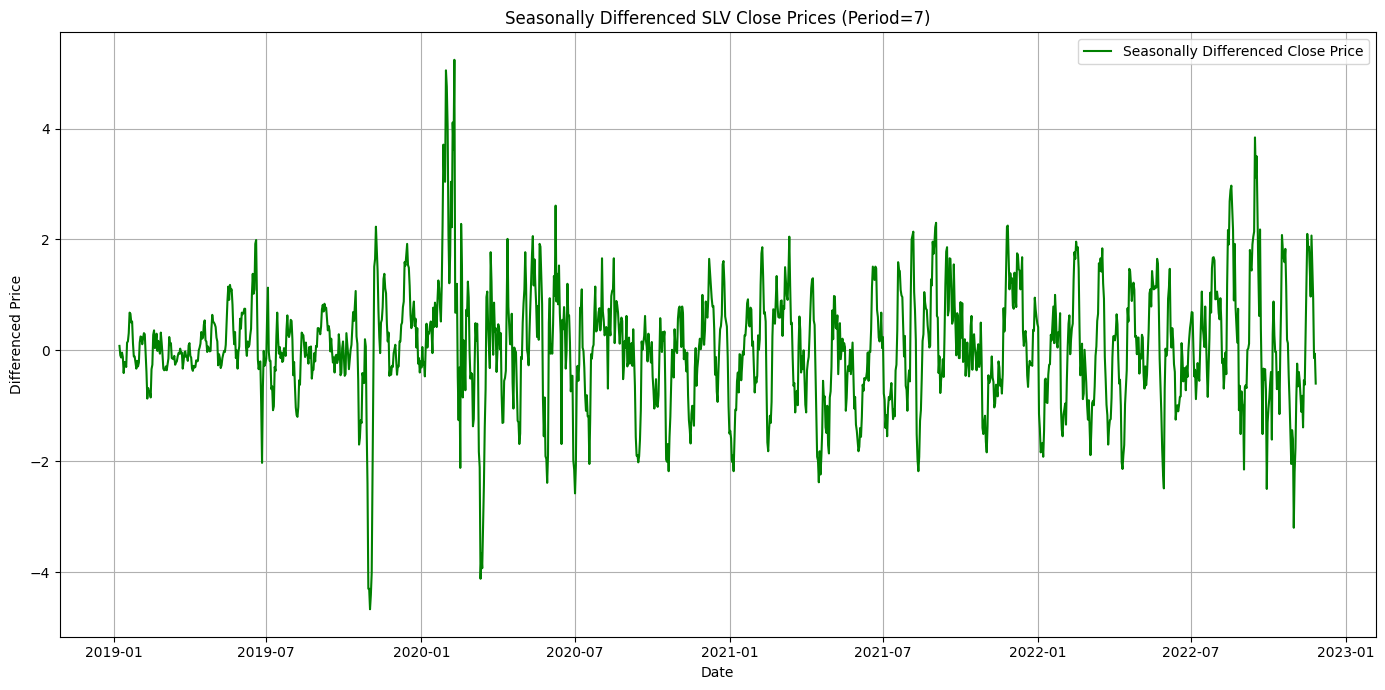

2024-09-30 20:28:42,528 - INFO - ADF Test Results (on seasonally differenced data):
2024-09-30 20:28:42,529 - INFO - Test Statistic: -6.493721214249773
2024-09-30 20:28:42,529 - INFO - p-value: 1.208776016140803e-08
2024-09-30 20:28:42,529 - INFO - Used Lag: 23
2024-09-30 20:28:42,530 - INFO - Number of Observations: 1395
2024-09-30 20:28:42,531 - INFO - Critical Values:
2024-09-30 20:28:42,531 - INFO -    1%: -3.435046325299633
2024-09-30 20:28:42,531 - INFO -    5%: -2.8636140901080456
2024-09-30 20:28:42,532 - INFO -    10%: -2.567874239154173
2024-09-30 20:28:42,532 - INFO - IC Best: 1710.9142285911075
2024-09-30 20:28:42,532 - INFO - Starting KPSS test with seasonal differencing...
2024-09-30 20:28:42,532 - INFO - Performing seasonal differencing with period=7...
2024-09-30 20:28:42,533 - INFO - Seasonal differencing completed.
2024-09-30 20:28:42,533 - INFO - Plotting seasonally differenced data for KPSS test...


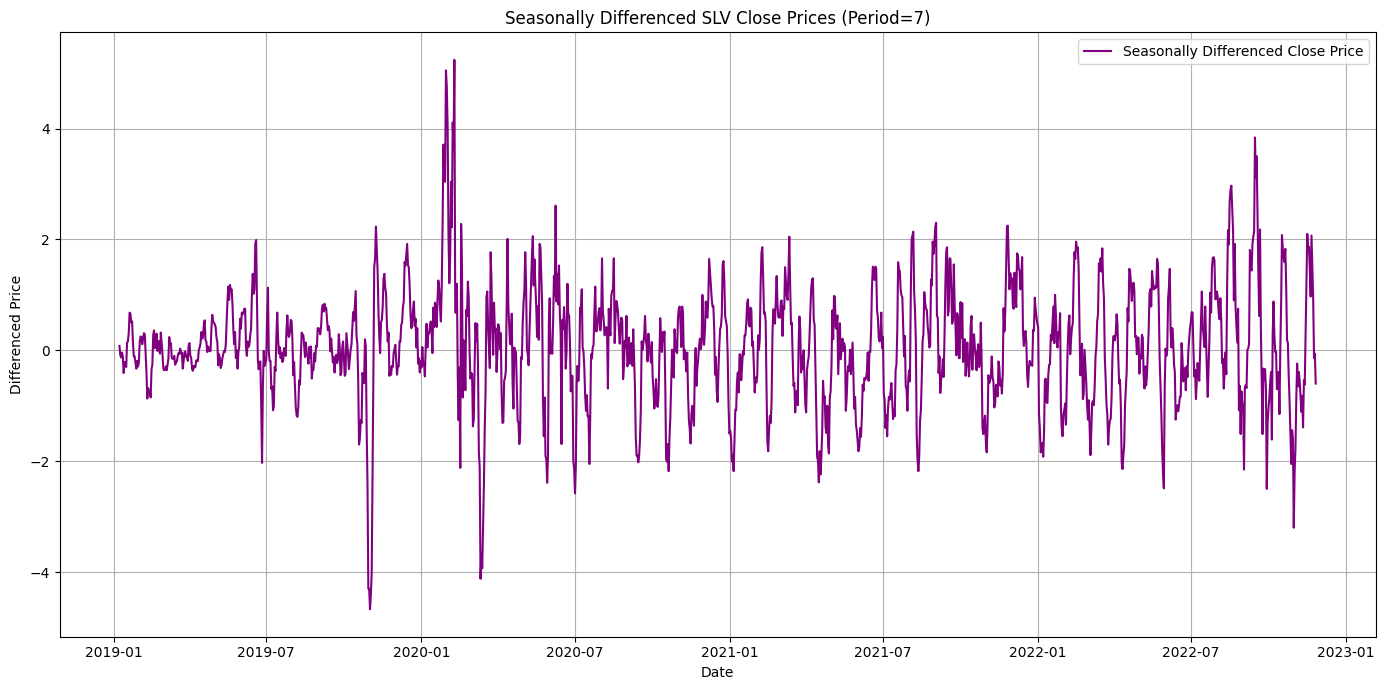

/var/folders/2c/trmbhl295p74b6v9kd24x24h0000gn/T/ipykernel_15511/493095000.py:115: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(differenced, regression=regression, nlags="auto")
2024-09-30 20:28:42,745 - INFO - KPSS Test Results (on seasonally differenced data):
2024-09-30 20:28:42,745 - INFO - Test Statistic: 0.05451079002927221
2024-09-30 20:28:42,746 - INFO - p-value: 0.1
2024-09-30 20:28:42,746 - INFO - Lags Used: 20
2024-09-30 20:28:42,746 - INFO - Critical Values:
2024-09-30 20:28:42,746 - INFO -    10%: 0.347
2024-09-30 20:28:42,746 - INFO -    5%: 0.463
2024-09-30 20:28:42,747 - INFO -    2.5%: 0.574
2024-09-30 20:28:42,747 - INFO -    1%: 0.739
2024-09-30 20:28:42,747 - INFO - Test Results:
2024-09-30 20:28:42,747 - INFO - {
    "ADF Test": {
        "Test Statistic": -6.493721214249773,
        "p-value": 1.208776016140803e-08,
       

In [32]:
# Fetch the SLV data
data = await get_SLV()

if data is None:
    logging.error("Data fetching failed. Exiting main function.")
    

# Perform ADF Test
adf_results = await perform_adf_test('SLV', data)
if adf_results is None:
    logging.error("ADF test failed.")

# Perform KPSS Test
kpss_results = await perform_kpss_test('SLV', data, regression='c')  # Use 'ct' if you want to include a trend
if kpss_results is None:
    logging.error("KPSS test failed.")

# Prepare the test results dictionary
test_results = {
    'ADF Test': adf_results,
    'KPSS Test': kpss_results
}

# Log the test results
logging.info("Test Results:")
logging.info(json.dumps(test_results, indent=4))

# Save the test results to a JSON file
json_filename = 'SLV_Test_Results.json'
try:
    with open(json_filename, 'w') as json_file:
        json.dump(test_results, json_file, indent=4, default=str)
    logging.info(f"Test results saved to '{json_filename}'.")
except Exception as e:
    logging.error(f"Failed to save test results to JSON: {e}")